In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

In [2]:
pokemon = pd.read_csv("Pokemon.csv", parse_dates = ["Type 1"])

In [3]:
df = pd.DataFrame(data = pokemon)
print(df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [ ]:
#character_compare = pd.crosstab(index = superheroes["EYES"] == Eyes1, columns = superheroes["ALIGN"] == Align1)
#character_compare.columns = ["Is not " + Align1, "Is " + Align1]
#character_compare.index = ["Does not have " + Eyes1, "Has " + Eyes1]

pokemon_compare= pd.crosstab(index = pokemon["Type 1"], columns = pokemon["HP"])
print(pokemon_compare)
#Type 1                                                      ...             
#Bug         1    0    1    0    0    2    1    1    0    1  ...    0    0   
#Dark        0    0    0    0    0    0    0    1    0    0  ...    0    0   
#Dragon      0    0    0    0    0    0    0    0    0    0  ...    0    0   
#Electric    0    0    1    1    0    0    0    2    0    0  ...    0    0   
#Fairy       0    0    0    0    0    0    0    1    0    0  ...    0    0   
#Fighting    0    0    0    0    0    1    0    1    0    0  ...    0    0   
#Fire        0    0    0    0    0    0    0    0    0    0  ...    0    0   
#Flying      0    0    0    0    0    0    0    0    0    0  ...    0    0   
#Ghost       0    0    1    0    0    1    0    0    0    0  ...    0    0   
#Grass       0    0    0    0    0    1    0    1    0    0  ...    0    0   
#Ground      0    1    0    0    0    0    0    1    0    0  ...    0    0   
#Ice         0    0    0    0    0    0    0    0    1    0  ...    0    0   
#Normal      0    0    0    0    0    1    0    2    0    0  ...    1    1   
#Poison      0    0    0    0    0    0    0    1    0    0  ...    0    0   
#Psychic     0    0    1    1    1    0    0    0    0    0  ...    0    0   
#Rock        0    0    0    0    0    3    0    2    0    0  ...    0    0   
#Steel       0    0    0    0    0    0    0    0    0    0  ...    0    0   
#Water       0    0    2    0    0    4    0    2    0    0  ...    0    0   


# **Welcome to the great Pokemon finder!** 
### Here to help you on your journey is the great Picachu!
#### <font color='yellow'>⣿⣿⣿⣿⣿⡏⠉⠛⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⠀⠀⠀⠈⠛⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⠛⠉⠁⠀⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣧⡀⠀⠀⠀⠀⠙⠿⠿⠿⠻⠿⠿⠟⠿⠛⠉⠀⠀⠀⠀⠀⣸⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣷⣄⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⣿⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⣴⣿⣿⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⡟⠀⠀⢰⣹⡆⠀⠀⠀⠀⠀⠀⣭⣷⠀⠀⠀⠸⣿⣿⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⠃⠀⠀⠈⠉⠀⠀⠤⠄⠀⠀⠀⠉⠁⠀⠀⠀⠀⢿⣿⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⢾⣿⣷⠀⠀⠀⠀⡠⠤⢄⠀⠀⠀⠠⣿⣿⣷⠀⢸⣿⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⡀⠉⠀⠀⠀⠀⠀⢄⠀⢀⠀⠀⠀⠀⠉⠉⠁⠀⠀⣿⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢹⣿⣿
#### <font color='yellow'>⣿⣿⣿⣿⣿⣿⣿⣿⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿

### Introduction
I remember when Pokemon was a huge movement back when I was a kid. People chased down holigraphic charzards to be at the top of the scene. Fast forward almost twenty years and I am lost. I wanted to examine how much Pokemon has expanded. Beyond that I wanted to see if they just introduced new Pokemon that were vastly superior and the old Pokemon just persihed. The question was is Pokemon remaining an even playing field through the years or do you always need new cards. I certainly believed that the original pokemon types would not be valid in the game today. For these graphs I analyzed all of the different attributes of the Pokemon. I constructed graphs to give meaning to the eight hundred Pokemon. Some will compare two type head to head and others to break every type down into its strenghts. Now the world of Pokemon goes further than the card statistics, but this project will be soley focused on the numbers.

### Data 
I obtained this data set from the site kaggle. It is a highly recommended site for csv files and the spreadsheets have high ratings for accuracy. The data was collected on the database of all Pokemon today. That data was split into categories of Pokemon total score, attack, defense, HP, Spell attack, and spell defense. It also lists which generation each Pokemon was created. I enjoyed this data set because it needed only limited cleaning. It was easy to read and understand in order to decide what data questions you may want to pose. The only other piece of data I wish this had was the exact year and month Pokemon were introduced. The generation is the way of understanding that but more specific time stamps are nice. 

### Computational Learning Curves
I truly tried to use every concept possible in order for this final project to meet my vision. Almost every computation concept is used throughout this project. I felt I needed to use them all to have a safisticated program to compute the graphs I was looking for. I used expression to convert the question in my head to actual visual graphs. I posed questions to the data set that can be evaluated by the user through inputs of their own. This obviously did not come with alot of testing and debugging to get the code to present exactly what I wanted. I had remixed some old code that I experimented with the previous projects and converted it to be useful now against a Pokemon data base. Then questioning of course is a heavily relied on perspective. How have Pokemon changed over twenty years and are old one still vialble as well as are the different types of Pokemon even across the board. Questioning the data set truly allowed me to look past just the surface questions and get more information.


# Picachu
> "If you are a begginner or a pro pokemaster, we will uncover your perfect pokemon together!"

### Follow the following link for information on the types of Pokemon. This will help you get an idea of the variations. 
###### [Pokemon Types](https://pokemon.fandom.com/wiki/Types) 

### Comparing opposing Pokemon
The first comparison we are going to make is between two desired types of pokemon. In this section you will select and input two pokemon types. The list of types is provided in the link above and a brief description of their strengths and weaknesses are listed. From the list of types pick your top two. Spelling is important and the first letter of the type needs to be capitalized. After that we are going to compare the two types on an attack level. Chose an appropriate attack level for your Pokemon within the range provided. Then we will analyze how many of those Pokemon from each type fall above and below that attack level. This will allow you to potentially chose what you think is the better type. Note that picking opposing types will make it more fun to analyze which is better. 

In [ ]:
type1 = input("There are many types of pokemon to chose from. From the list above which of them is the most appealling to you?")
type2 = input("Now chose one more of the listed pokemon types")
over1980 = input("Now pick an attack number you think would be good for your pokemon.(Range 10-194)")

list_type1a = []
list_type2a = []
list_type1b = []
list_type2b = []

num_rows = df.shape[0]






for row in range(num_rows):
    if(df["Type 1"][row]=="ND") or (df["Attack"][row]=="ND"):
        continue
    elif(df["Attack"][row] >= int(over1980) and (df["Type 1"][row] == type1)):
        list_type1a.append(df["Name"][row])

for row in range(num_rows):
    if(df["Type 1"][row]=="ND") or (df["Attack"][row]=="ND"):
        continue
    elif(df["Attack"][row] >= int(over1980) and (df["Type 1"][row] == type2)):
        list_type2a.append(df["Name"][row])
        
for row in range(num_rows):
    if(df["Type 1"][row]=="ND") or (df["Attack"][row]=="ND"):
        continue
    elif(df["Attack"][row] <= int(over1980) and (df["Type 1"][row] == type1)):
        list_type1b.append(df["Name"][row])

for row in range(num_rows):
    if(df["Type 1"][row]=="ND") or (df["Attack"][row]=="ND"):
        continue
    elif(df["Attack"][row] <= int(over1980) and (df["Type 1"][row] == type2)):
        list_type2b.append(df["Name"][row])
        
        
#print the total number of characters in the data
print("\nTotal number of characters: " + str(len(pokemon)))
print("\nTotal number of Pokemon with type " + type1 + " and attack over " + over1980 + " :"+ str(len(list_type1a)))
print("\nTotal number of Pokemon with type " + type2 + " and attack over " + over1980 + " :"+ str(len(list_type2a)))
print("\nTotal number of Pokemon with type " + type1 + " and attack under " + over1980 + " :"+ str(len(list_type1b)))
print("\nTotal number of Pokemon with type " + type1 + " and attack under " + over1980 + " :"+ str(len(list_type2b)))

chart_values = [str(len(list_type1a)),str(len(list_type1b)),str(len(list_type2a)),str(len(list_type2b))]
chart_labels = ["Pokemon with the type " + type1 + " and greater than " + over1980,"Pokemon with the type " + type1 + " and less than " + over1980,"Pokemon with the type " + type2 + " and greater than " + over1980,"Pokemon with the type " + type2 + " and less than " + over1980]

plt.axis('equal')
plt.title("The percentage of Pokemon with the types " + type1 + " and " + type2 + " and if their attack falls above or below " + over1980, fontsize = 18)
plt.pie(chart_values,labels=chart_labels,autopct='%2.1f')
plt.show()

### Analysis of Comparing opposing Pokemon
The analysis will depend on the user inputs. Written above it was recommended to chose two opposing Pokemon type. Now that you have entered those two Pokemon types, along with a desired attack level, do you see a significantly unbalanced fight. This graph illustrates how many Pokemon fall above and below your inputed attack level. If one has a significantly higher amount of its Pokemon above and the other has them below, you've found an unbalanced comparison. This graph can allow someone to compare their two favorite types and come to the conclusion of which is best based on attack statistic. 

### Type Comparison Across All Attributes
This was the most important data question that I wanted to posed. Are all types balanced. Meaning if they have high attack do they suffer lower in another attribute? For this data questions I created subplots for each attribute. Then crossed it with every Pokemon type. This will allow you to follow each Pokemon type to see the strenghts and weaknesses of each. A piece like this could be vital to the Pokemon player to see what strong attributed characters they are missing in their deck and might need. 


Text(0.5, 1.0, 'Spell Attack by Type')

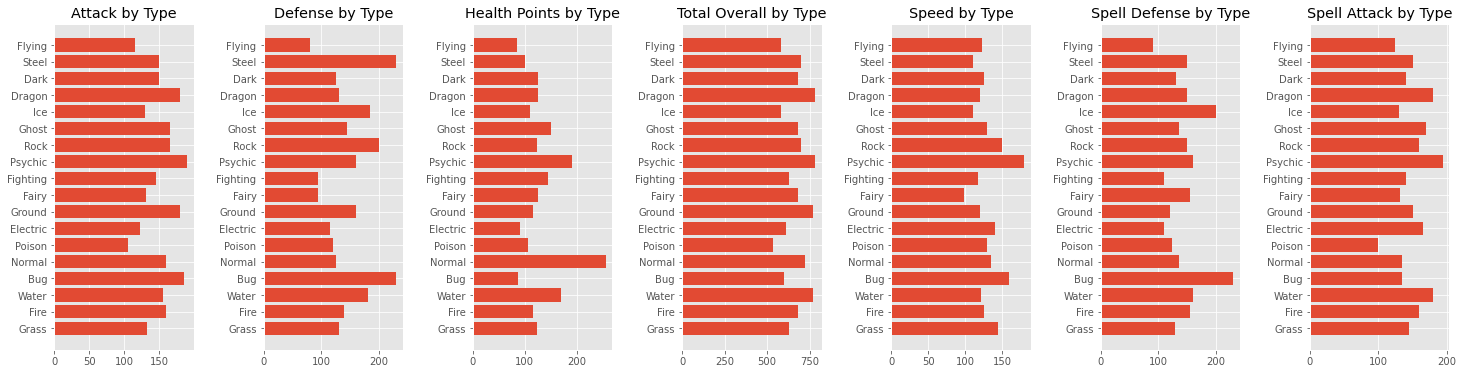

In [4]:



type1 = (df['Type 1'])
attack1 = df['Attack']
defense = df['Defense']
hp = df['HP']
total = df['Total']
speed = df['Speed']
spell_defense = df['Sp. Def']
spell_attack = df['Sp. Atk']
generation = df['Generation']



plt.style.use('ggplot')
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(nrows=1,ncols=7,figsize=(25,6))
plt.subplots_adjust(wspace=.5)

ax1.barh(type1,attack1)
ax1.set_title('Attack by Type')
ax2.barh(type1,defense)
ax2.set_title('Defense by Type')
ax3.barh(type1,hp)
ax3.set_title('Health Points by Type')
ax4.barh(type1,total)
ax4.set_title('Total Overall by Type')
ax5.barh(type1,speed)
ax5.set_title('Speed by Type')
ax6.barh(type1,spell_defense)
ax6.set_title('Spell Defense by Type')
ax7.barh(type1,spell_attack)
ax7.set_title('Spell Attack by Type')


#credit Absent Data for the help setting up subplots


### Anaylsis of Comparing Pokemon Across Attributes
This comparison created the perfect visual representation of pokemon attributes by type. You can follow one type from left to right and see how it rises and falls in each category. I would say the Pokemon world seems pretty even across the board. When a type is high in 1 category it seems to sink in another. That indicates that each type has certain strenghts and weaknesses. 

### Pokemon Comparison of Two Stats and Generation
For the final graph here the question is are the new generations of Pokemon more powerful? So to compare this the user is asked to input two statistics important to them. The statistics will be displayed on the x and y axis. Then a legend is provided with colors for each corresponding generation of Pokemon. From these graphs the user will be able to look at each type of Pokemon and compare them. Every dot is an individual Pokemon. These graphs can allow us to draw correlation lines between two statistics if it exsists in a type. It shows exactly how much variance exists in the Pokemon world and how even new generations are mixed with the same attributes as old.

Pick your First attribute to compare(Attack, HP, Total, Speed, Sp. Def, Sp. Atk, Defense) Attack
Pick your Second and different attribute to compare(Attack, HP, Total, Speed, Sp. Def, Sp. Atk, Defense) Defense


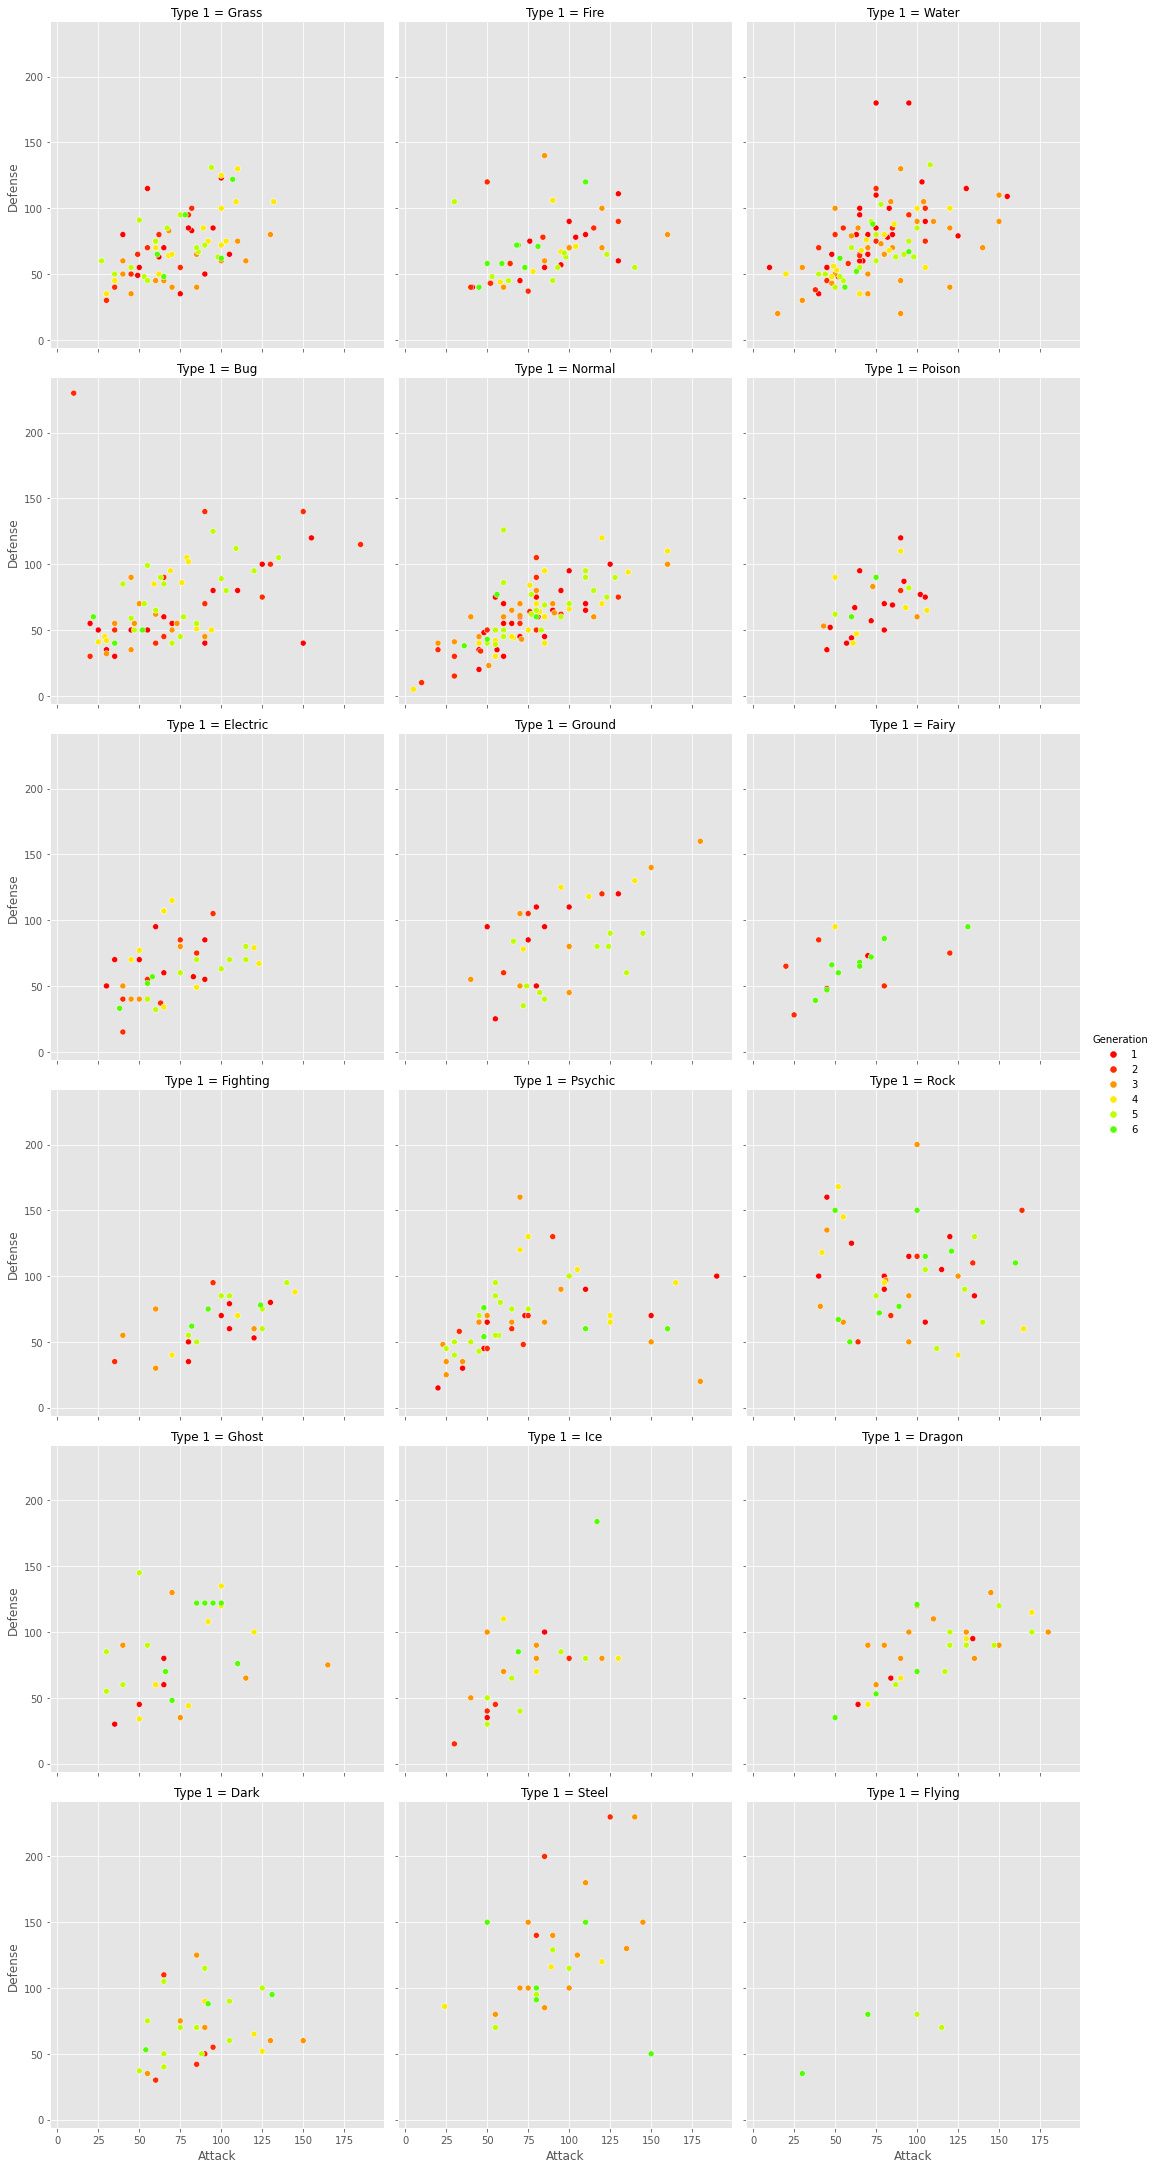

In [7]:
attack1 = input("Pick your First attribute to compare(Attack, HP, Total, Speed, Sp. Def, Sp. Atk, Defense)")
attack2 = input("Pick your Second and different attribute to compare(Attack, HP, Total, Speed, Sp. Def, Sp. Atk, Defense)")


sns.relplot(x=attack1, y=attack2, col='Type 1', col_wrap=3 , hue = 'Generation', palette='prism', data=df)


#Credits to https://seaborn.pydata.org/tutorial/axis_grids.html for listing nice examples of how to format seaborn charts. 

#### Analysis of Pokemon Generations
Through these graphs you are able to truly understand how Pokemon rate across their different attributes. Every dot gives you representaion of every Pokemon and what generation they come from. This allows you to decide for yourself if you think the Pokemon world has stayed even throughout. I personally think they have done an amazing job diversifying how many Pokemon they have while still keeping old Pokemon in play.

### Conclusion
The focus of this project was to explore if Pokemon had even statistics across the different types of Pokemon and the different generations. To conclude through the representaions of these graphs I think it is safe to say they have remained even. The subplots show all statistics across all types. Where one is strong in a statistic they are weak in another. Then the seaborn graphs allow you to look at every single Pokemon represented as a dot. From this correlations can be drawn and you can see each generation of Pokemon and where they fall in stats, so you can see again that even with the new introduction of Pokemon they remain even. This allows the company to diversify new and fun Pokemon while still keeping older ones in play. 

#### Pikachu
>"Thanks for helping me explore the Pokemon world. I hope this helped you decide which Pokemon you want to capture next!"

* # <font color='red'>ACKNOWLEDGMENTS!
* Data from :https://www.kaggle.com/rounakbanik/pokemon 
* Huge thanks to Shiva info 1201 for an amazing class!
* Credits codebasics youtube for the idea of setting up the pie chart list. I organized it to list all the string counts but gathered that inspiration from them. 
* Credits the inclase comment skeleton for ways to restrict unwanted data
* Credits to Kimberly Fessel youtube for learning how to plant the legend outside of the graph. This made sure my information could be easy to read and not blocked by large data sections.
* Credit Absent Data youtube for the help setting up subplots  
* Credits to https://seaborn.pydata.org/tutorial/axis_grids.html for listing nice examples of how to format seaborn charts.